**1.Importing Necessary Libraries**





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Required Files(To be shared with the learners)\sales_data_sample.csv",encoding = 'latin')

**2.Displaying a sample of five rows of the data frame**

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**3.Checking shape of the data and general info about the data**

In [6]:
df.shape

(2823, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

**4.Checking percentage missing values in each column of the data**

In [10]:
Total = df.isnull().sum().sort_values(ascending=False)        

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


**5.checking if there any duplicate rows**

In [11]:
len(df[df.duplicated()])

0

# **Visualize the data**

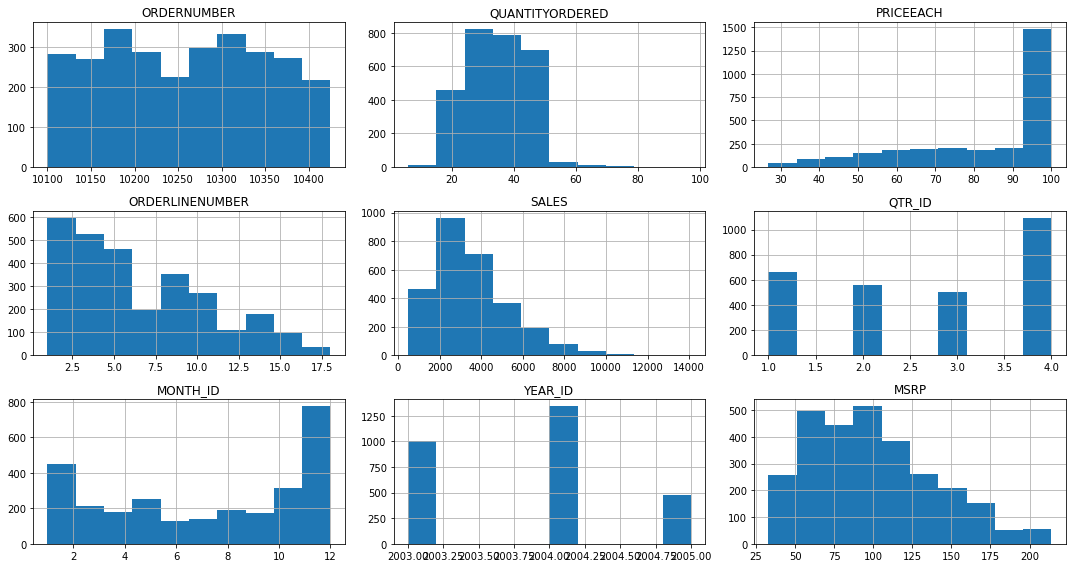

In [12]:
plt.rcParams['figure.figsize'] = [15,8]
df.hist()
plt.tight_layout()
plt.show()

**6.Converting the labales of STATUS column**

In [13]:
df['STATUS'] = df['STATUS'].replace({'Shipped':int(1),'Disputed':int(0),'In Process':int(0),'Cancelled':int(0),'On Hold':int(0),'Resolved':int(0)})

In [14]:
df['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

**7.Dropping some columns**

In [15]:
df = df.drop(['ORDERNUMBER','ORDERDATE','PHONE','ADDRESSLINE1', 'ADDRESSLINE2','CONTACTLASTNAME', 'CONTACTFIRSTNAME','PRODUCTCODE'], axis=1)

**8.Imputing the missing values**

In [16]:
df['TERRITORY']=df['TERRITORY'].replace({'EMEA':int(1),'APAC':int(2),'Japan':int(3)})
df['TERRITORY'].fillna(int(1),inplace=True)

In [17]:
df['STATE'].fillna(df['STATE'].mode(),inplace=True)

In [18]:
df['POSTALCODE'].fillna(df['POSTALCODE'].mode(),inplace=True)

In [19]:
df = df.drop(['STATE','POSTALCODE'],axis=1)

In [20]:
df.shape

(2823, 15)

**9.Using Lable Encoder for Categorical columns**

In [21]:
label_encoder = preprocessing.LabelEncoder()

cols = ['PRODUCTLINE','CUSTOMERNAME','CITY','COUNTRY', 'TERRITORY','DEALSIZE']
for i in cols:
    df[i]= label_encoder.fit_transform(df[i])

In [22]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,1,1,2,2003,1,95,45,42,18,0,2
1,34,81.35,5,2765.90,1,2,5,2003,1,95,66,56,6,0,2
2,41,94.74,2,3884.34,1,3,7,2003,1,95,46,52,6,0,1
3,45,83.26,6,3746.70,1,3,8,2003,1,95,85,53,18,0,1
4,49,100.00,14,5205.27,1,4,10,2003,1,95,23,59,18,0,1


<AxesSubplot:>

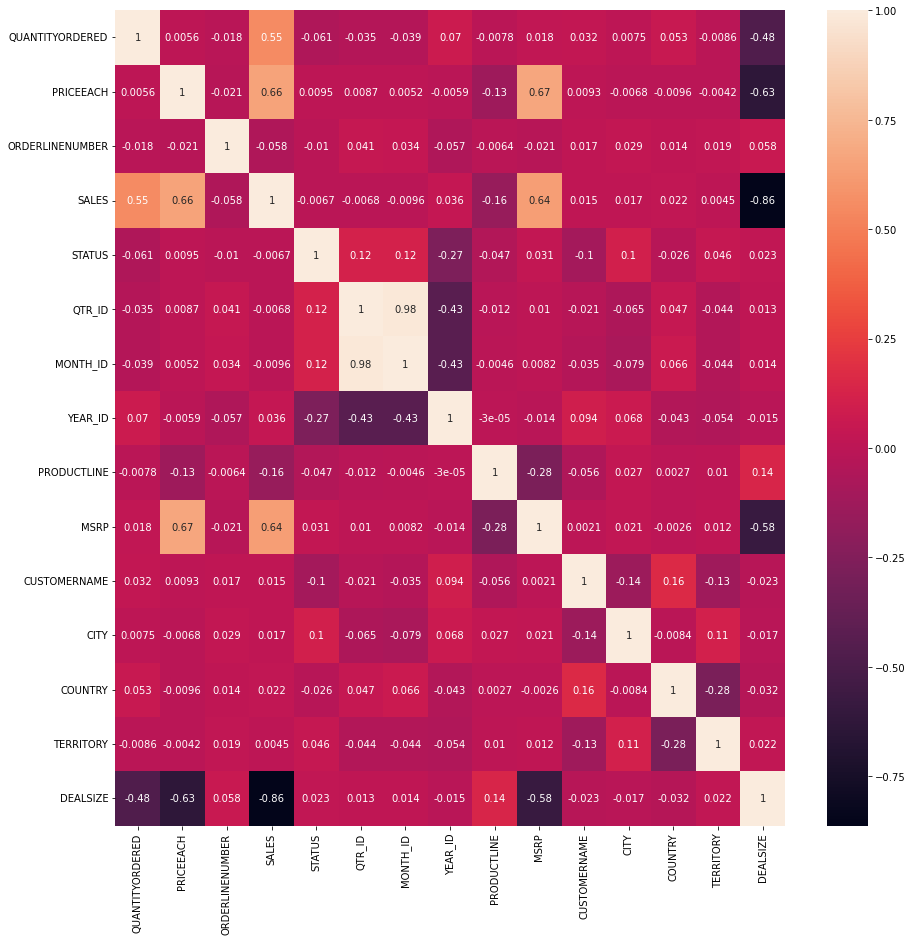

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

**10 Using OneHotEncoder for converting categorical columns into dummy columns**


---

NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
have huge  number of categorical variables

---

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

#Passing encoded columns
cols = ['ORDERLINENUMBER','QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE','CUSTOMERNAME',
       'CITY', 'COUNTRY', 'TERRITORY', 'DEALSIZE']
enc_data=pd.DataFrame(enc.fit_transform(df[cols]).toarray())
  
#Merge with main
New_df=df.join(enc_data)

New_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,224,225,226,227,228,229,230,231,232,233
0,30,95.70,2,2871.00,1,1,2,2003,1,95,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,34,81.35,5,2765.90,1,2,5,2003,1,95,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,94.74,2,3884.34,1,3,7,2003,1,95,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,45,83.26,6,3746.70,1,3,8,2003,1,95,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,49,100.00,14,5205.27,1,4,10,2003,1,95,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
New_df = New_df.drop(cols,axis=1)

In [26]:
New_df.shape

(2823, 239)

# **Standardizing the Features**

In [27]:
l = New_df.values
l.shape

(2823, 239)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(l)
l_scaled = scaler.transform(l)

# **PCA Analysis**

In [29]:
from sklearn.decomposition import PCA

pca_239 = PCA(n_components=239 ,  random_state=42)
pca_239.fit(l_scaled)
l_pca_239 = pca_239.transform(l_scaled)

In [30]:
print("Variance Explained by all 239 principal components:",
      sum(pca_239.explained_variance_ratio_ * 100))

Variance Explained by all 239 principal components: 99.99999999999996


---



Note : We have set n_components=239.The original number of dimensions in our dataset is also 239. We have not reduced the dimensionality at all (we’ve just transformed the data). Therefore, the percentage of variance explained by 239 principal components should be 100%.



---



Text(0, 0.5, 'Explained variance (%)')

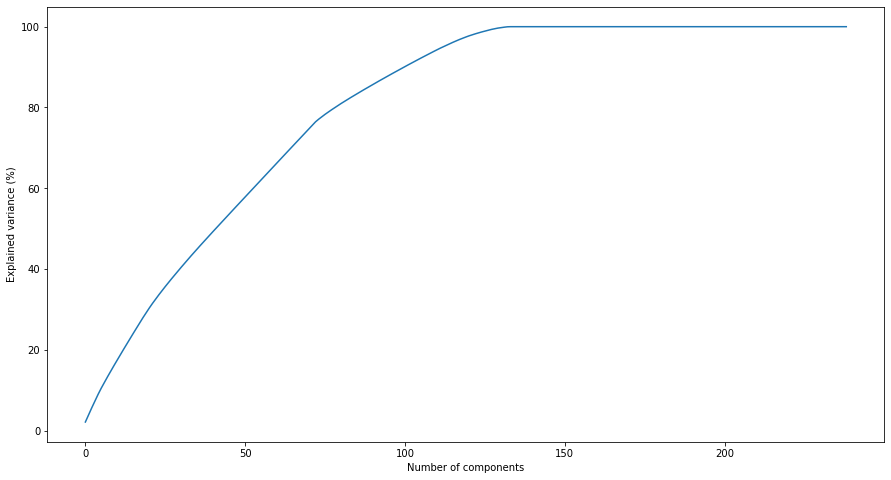

In [31]:
plt.plot(np.cumsum(pca_239.explained_variance_ratio_ *100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [32]:
print("Variance Explained by the First principal components:",
      np.cumsum(pca_239.explained_variance_ratio_ * 100)[0])
print("Variance Explained by the First 2 principal components:",
      np.cumsum(pca_239.explained_variance_ratio_ * 100)[1])
print("Variance Explained by the First 3 principal components:",
      np.cumsum(pca_239.explained_variance_ratio_ * 100)[2])
print("Variance Explained by the First 100 principal components:",
      np.cumsum(pca_239.explained_variance_ratio_ * 100)[100])

Variance Explained by the First principal components: 2.1474332702223435
Variance Explained by the First 2 principal components: 3.940518017480907
Variance Explained by the First 3 principal components: 5.670808260769742
Variance Explained by the First 100 principal components: 90.13667031913799


---
Note:
You can see that the first 100 (refer plot also) principal components keep about 90% of the variability in the dataset while reducing 139 (out of 239) features in the dataset. That’s great. The remaining 139 features only contain less than 10% of the variability in data.

---

# Apply PCA by setting n_components=2

In [33]:
pca_2 = PCA(n_components=2 , random_state=42)
pca_2.fit(l_scaled)
l_pca_2 = pca_2.transform(l_scaled)

<AxesSubplot:>

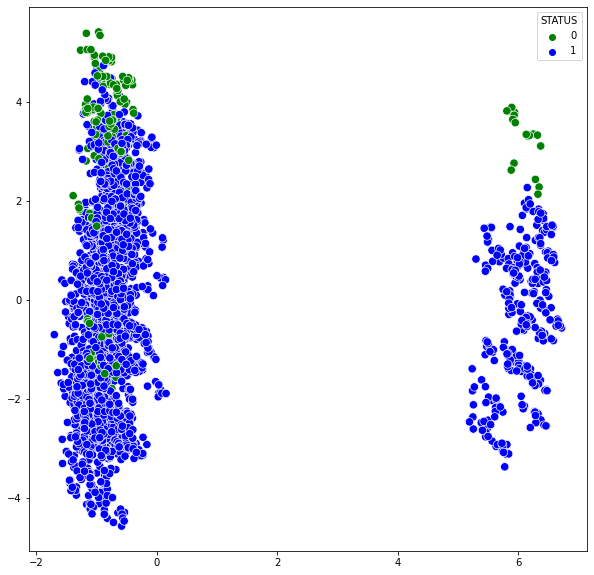

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=l_pca_2[:,0],y=l_pca_2[:,1],s=70,
                hue=New_df['STATUS'], palette=["green",'blue'])


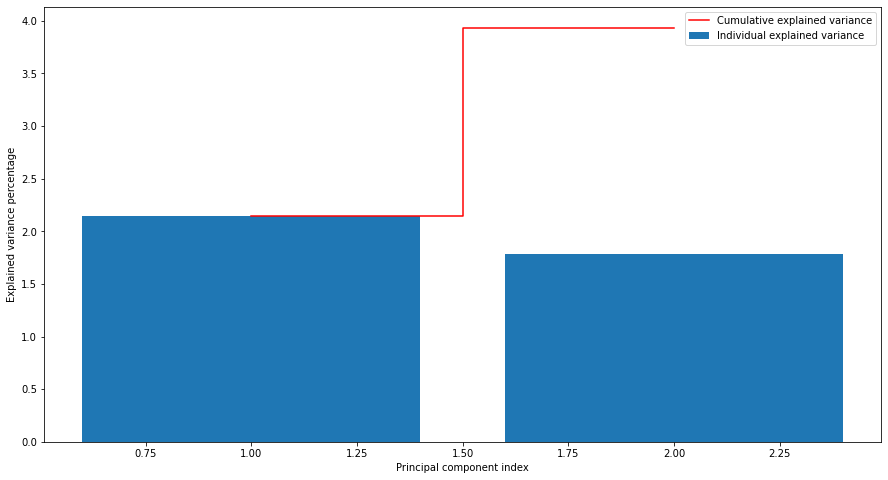

In [35]:
exp_var = pca_2.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1,len(exp_var)+1), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1,len(exp_var)+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
#plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
#plt.tight_layout()


---
Above plot of two principal components that captures only 3.94% (approx 4%) of the varibility in the data

Note :Reducing the number of dimensions down to two or three makes it possible to create a 2d scatterplot or 3d scatterplot which helps us to detect patterns such as clusters. Therefore, dimensionality reduction is extremely useful for data visualization.



---



# Apply PCA by setting n_components=0.90

In [36]:
pca_90 = PCA(n_components=0.90 ,  random_state=42)
pca_90.fit(l_scaled)
l_pca_90 = pca_90.transform(l_scaled)

In [37]:
l_pca_90.shape

(2823, 101)

---
Note : for getting approx 90% of Explained Variance we need to consider 101 components

---



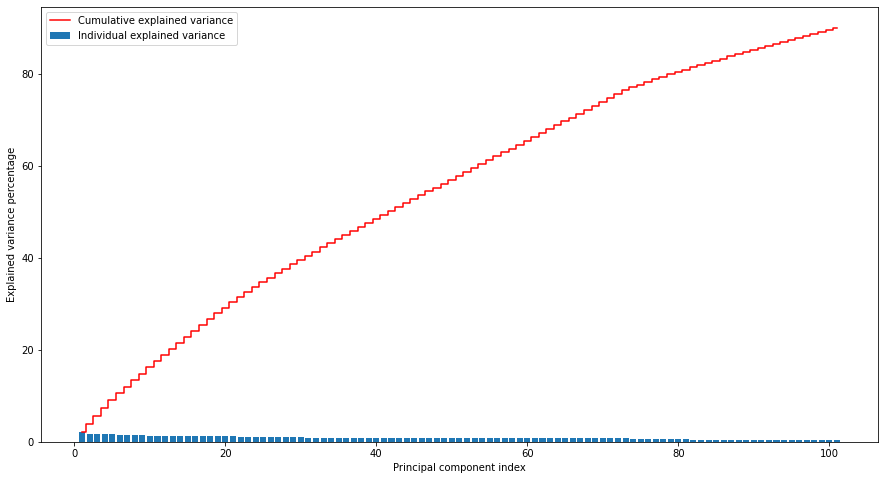

In [38]:
exp_var = pca_90.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1,len(exp_var)+1), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1,len(exp_var)+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
#plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
#plt.tight_layout()

# CREATE DATASET WITH 101 PRINCIPAL COMPONENTS 

In [39]:
cols = []
for i in range(1,102):
  z = 'PC'+str(i)
  cols.append(z)
print(cols)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101']


In [40]:
df_new = pd.DataFrame(l_pca_90,columns = cols)
df_new['label']=New_df['STATUS']
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,label
0,-0.720063,0.122605,-0.515013,0.513189,0.466034,-0.397343,-1.913108,-0.910245,0.445693,-0.846670,...,0.577155,-0.743289,-0.498545,-0.360832,0.000424,0.300017,-0.473126,-0.445127,1.128234,1
1,-0.523368,1.852052,-1.034158,0.835044,-1.691395,-0.134223,-1.363387,2.460917,-2.327585,0.540751,...,0.990080,-0.606732,0.998591,0.537201,-0.077965,-0.393844,-0.139949,0.022649,-0.566167,1
2,-0.633494,0.561011,0.161267,-0.848280,1.377325,-0.314234,-1.229960,3.040107,-1.968389,0.749645,...,2.857813,-1.110642,-1.615747,0.238861,-0.848383,1.133633,-0.566972,-1.610988,0.195993,1
3,-1.149383,0.140874,-0.295421,-0.395156,3.194258,0.463342,-2.599492,-1.882040,-0.051200,0.449180,...,-0.724311,0.135181,-1.351210,-0.346661,-0.685748,-0.353264,-0.616916,-0.687163,0.874235,1
4,-1.313791,-2.139680,1.716268,-1.300342,-0.158448,-0.429695,-1.956205,-1.272060,-0.368736,-0.949130,...,-0.479470,-1.863546,0.288208,-0.323261,-1.236211,3.398699,1.107271,-0.206596,-0.350448,1


In [41]:
df_new.shape

(2823, 102)

# LDA ANALYSIS

**1.Splitting the dataset into two parts (80% train and 20% test) using random state 42**

In [42]:
y = df['STATUS']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(l, y, test_size = 0.2, random_state=42)

# check the shape of the train and test sets
print('X_train_raw:', X_train_raw.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test_raw.shape)
print('y_test:', y_test.shape)

X_train_raw: (2258, 239)
y_train: (2258,)
X_test_raw: (565, 239)
y_test: (565,)


**2.Training LDA setting n components = 1**

In [43]:
lda = LDA(n_components = 1)

# fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train_raw, y_train)

# transform the test data 
X_test_lda = lda.transform(X_test_raw)

In [44]:
X_train_lda.shape, X_test_lda.shape

((2258, 1), (565, 1))

**3.Training RandomForest Model**

In [45]:
def randomforest_model_run(X_train, X_test, y_train, y_test):
    
    # create a random forest classifier object
    # pass the random state to obtain the reproducible results
    rf_clf = RandomForestClassifier(random_state=42)
    
    # fit the random forest model on the train data
    rf_clf.fit(X_train, y_train)
    
    # predict the output values for test set
    y_pred = rf_clf.predict(X_test)
    
    # calculate accuracy for test set
    test_acc = accuracy_score(y_test, y_pred)
    
    # return the test accuracy 
    return print('Test Accuracy:', test_acc)

**5.Applying random forest model on LDA**

In [46]:
%%time
randomforest_model_run(X_train_lda, X_test_lda, y_train, y_test)

Test Accuracy: 0.9398230088495575
Wall time: 340 ms


**6.Applying randomforest model on main data**

In [47]:
%%time
randomforest_model_run(X_train_raw, X_test_raw, y_train, y_test)

Test Accuracy: 1.0
Wall time: 444 ms


In [48]:
y = df['STATUS']
X_train_pca2, X_test_pca2, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state=42)
print('X_train_pca90:', X_train_pca2.shape)
print('y_train:', y_train.shape)
print('X_test_pca90:', X_test_pca2.shape)
print('y_test:', y_test.shape)

X_train_pca90: (2258, 102)
y_train: (2258,)
X_test_pca90: (565, 102)
y_test: (565,)


In [49]:
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,label
0,-0.720063,0.122605,-0.515013,0.513189,0.466034,-0.397343,-1.913108,-0.910245,0.445693,-0.846670,...,0.577155,-0.743289,-0.498545,-0.360832,0.000424,0.300017,-0.473126,-0.445127,1.128234,1
1,-0.523368,1.852052,-1.034158,0.835044,-1.691395,-0.134223,-1.363387,2.460917,-2.327585,0.540751,...,0.990080,-0.606732,0.998591,0.537201,-0.077965,-0.393844,-0.139949,0.022649,-0.566167,1
2,-0.633494,0.561011,0.161267,-0.848280,1.377325,-0.314234,-1.229960,3.040107,-1.968389,0.749645,...,2.857813,-1.110642,-1.615747,0.238861,-0.848383,1.133633,-0.566972,-1.610988,0.195993,1
3,-1.149383,0.140874,-0.295421,-0.395156,3.194258,0.463342,-2.599492,-1.882040,-0.051200,0.449180,...,-0.724311,0.135181,-1.351210,-0.346661,-0.685748,-0.353264,-0.616916,-0.687163,0.874235,1
4,-1.313791,-2.139680,1.716268,-1.300342,-0.158448,-0.429695,-1.956205,-1.272060,-0.368736,-0.949130,...,-0.479470,-1.863546,0.288208,-0.323261,-1.236211,3.398699,1.107271,-0.206596,-0.350448,1


In [50]:
%%time
randomforest_model_run(X_train_pca2,X_test_pca2, y_train, y_test)

Test Accuracy: 1.0
Wall time: 1.33 s
